### Fit the image charge potential with DSF potential


In [555]:
import numpy as num
import pandas as pan
import scipy.special as sci
import pylab as lab
from scipy.optimize import curve_fit
%matplotlib inline

In [556]:
potVal={'Au100':1,"Au111":2,"Cu100":3,"Cu111":4,"Pt100":5}

In [557]:
def Fitting(system,path,potential,alpha,r0,skip=1):
    
    finalpath=path+system
    params={}
    plot={}
    subSystems=["hollow","top","bridge"]
    for ss in subSystems:
        dataPath=finalpath+ss+".dat"
        data=pan.read_csv(dataPath,delimiter="\t",skiprows=skip,names=["d","E","T","U"])
        dFrame=pan.DataFrame(data)
        dFrame.U=0.04336412*(dFrame.U-(potential))
          
        def Pot(r,a0,a1):
            v=sci.erfc(a0*alpha*(r+a1))/(a0*(r+a1))
            return -14.399*v    
        
    
        param,covar=curve_fit(Pot,dFrame.d,dFrame.U)
        x=num.linspace(min(dFrame.d),max(dFrame.d),1000)
        y=Pot(x,param[0],param[1])
        lab.plot(dFrame.d,dFrame.U,'o')
        lab.plot(x,y,'-r')
        lab.xlabel("d")
        lab.ylabel("U(eV)")
        lab.title(system+ss)
        lab.text(max(dFrame.d)-5,min(dFrame.U),param)
        lab.show()
        params[ss]=param
        #plot[ss]=fig
        
        
    return params

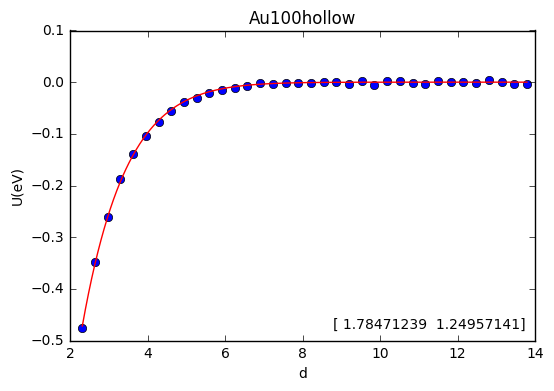

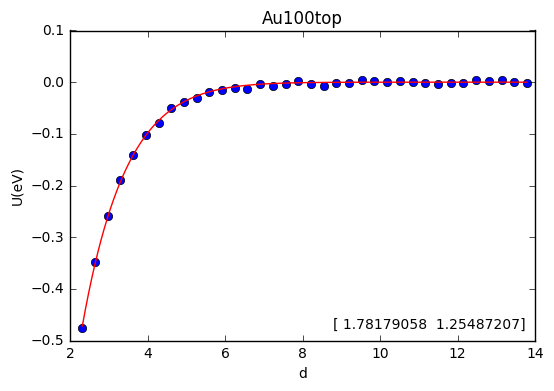

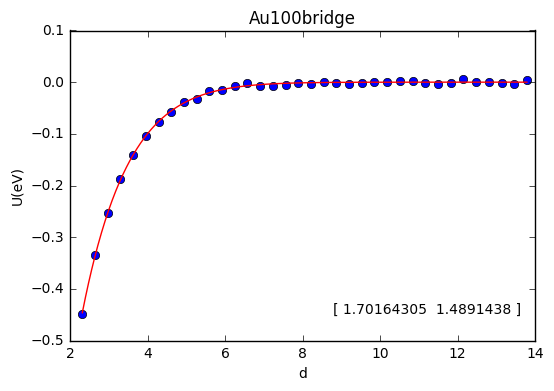

In [537]:
Au100=Fitting("Au100","../FDEAMCrystalCalculations/ImageCharge/",-153105.37,0.14,12,5)

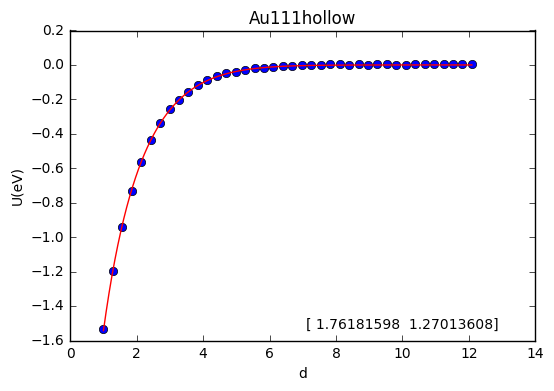

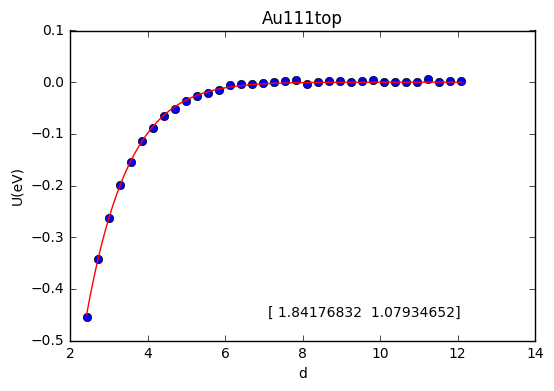

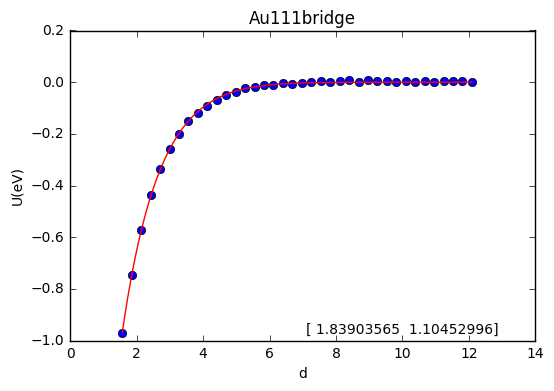

In [538]:
Au111=Fitting("Au111","../FDEAMCrystalCalculations/ImageCharge/",-128265.4,0.14,12)

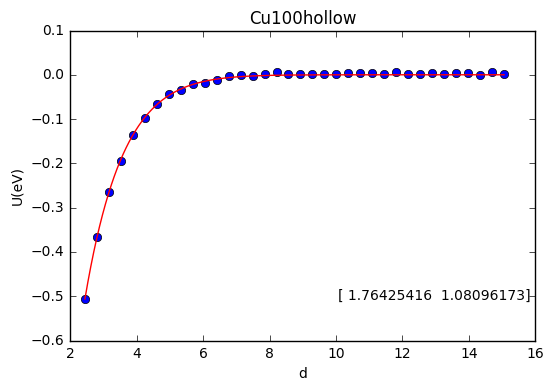

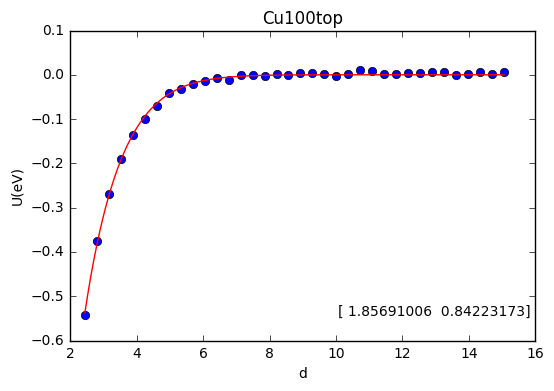

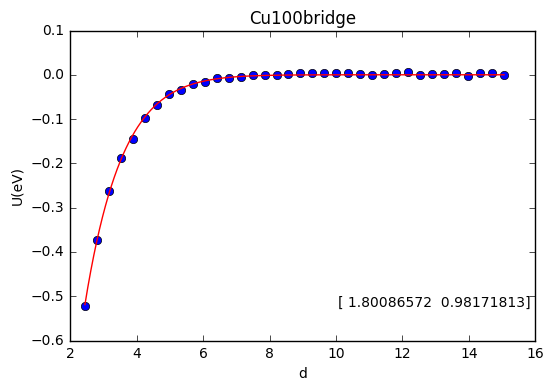

In [539]:
Cu100=Fitting("Cu100","../FDEAMCrystalCalculations/ImageCharge/",-136850.14,0.14,12,5)

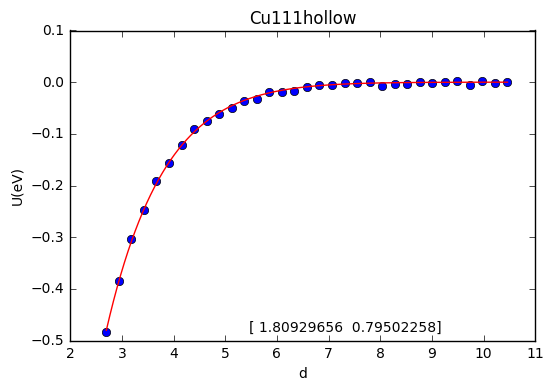

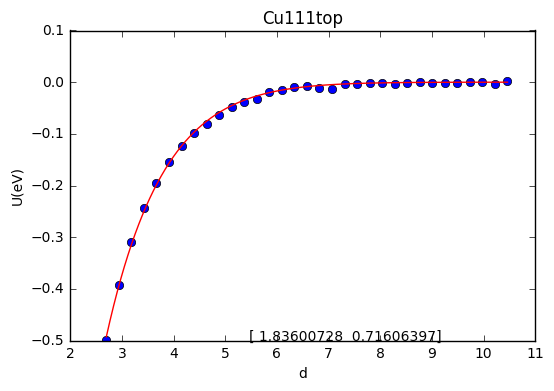

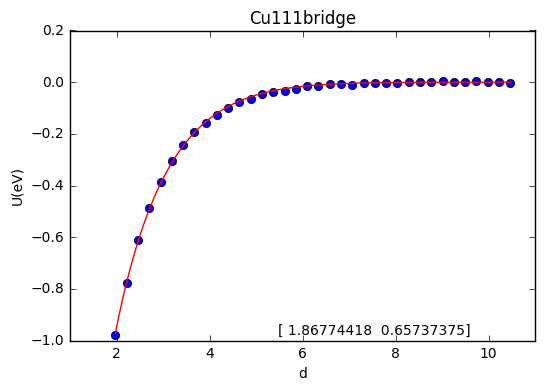

In [540]:
Cu111=Fitting("Cu111","../FDEAMCrystalCalculations/ImageCharge/",-144036.85,0.14,12)

In [542]:
print("\nCu111")
print("*******************")
print(pan.DataFrame(Cu111,index=['a0','a1']))
print("\nAu111")
print("*******************")
print(pan.DataFrame(Cu100,index=['a0','a1']))
print("\nCu100")
print("*******************")
print(pan.DataFrame(Au111,index=['a0','a1']))
print("\nAu100")
print("*******************")
print(pan.DataFrame(Au100,index=['a0','a1']))


Cu111
*******************
      bridge    hollow       top
a0  1.867744  1.809297  1.836007
a1  0.657374  0.795023  0.716064

Au111
*******************
      bridge    hollow       top
a0  1.800866  1.764254  1.856910
a1  0.981718  1.080962  0.842232

Cu100
*******************
      bridge    hollow       top
a0  1.839036  1.761816  1.841768
a1  1.104530  1.270136  1.079347

Au100
*******************
      bridge    hollow       top
a0  1.701643  1.784712  1.781791
a1  1.489144  1.249571  1.254872


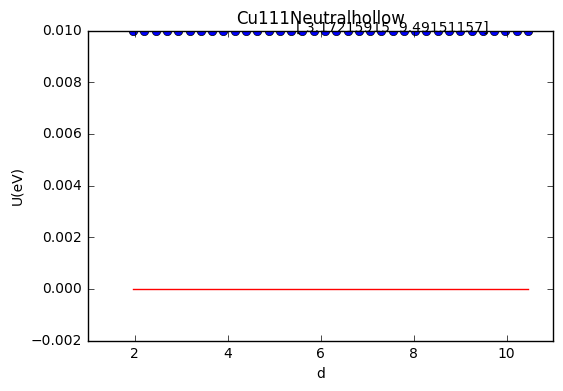

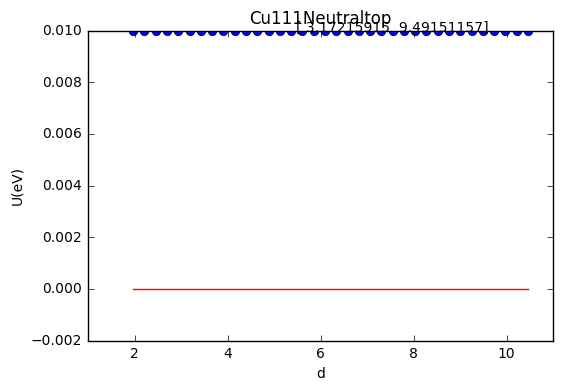

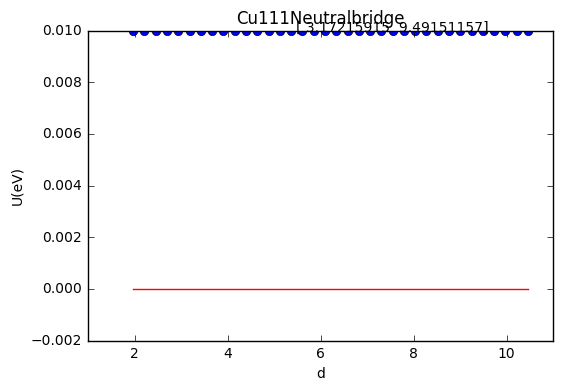

In [558]:
Cu111Neutral=Fitting("Cu111Neutral","../FDEAMCrystalCalculations/ImageCharge/",-144021,0.14,12,5)

In [562]:
data=pan.read_csv("../FDEAMCrystalCalculations/ImageCharge/Cu111Neutralhollow.dat",delimiter="\t",skiprows=1,names=["d","E","T","U"])
d=pan.DataFrame(data)
d.head()

,d,E,T,U
0,1.000000,-144020.77,0.0,-144020.77
1,1.242638,-144020.77,0.0,-144020.77
2,1.485277,-144020.77,0.0,-144020.77
3,1.727915,-144020.77,0.0,-144020.77
4,1.970554,-144020.77,0.0,-144020.77


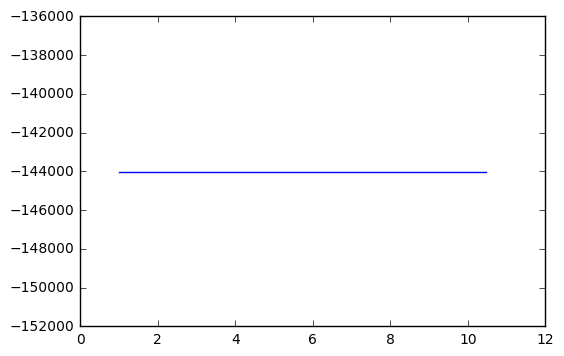

In [561]:
lab.plot(d.d,d.U)

In [322]:
df=dFrame.sort_values('d')
#df.to_csv("../FDEAMCrystalCalculations/ImageCharge/largeAlpha.dat",sep='\t',header=False,index=False)
df.head()

,d,E,T,U
0,1.383195,-204902.23,76.020918,-0.823918
1,1.574792,-204900.17,75.599405,-0.715942
2,1.766390,-204898.09,75.371840,-0.615771
3,1.957987,-204896.59,75.037957,-0.536414
4,2.149585,-204895.06,74.751681,-0.457491


In [30]:
param,covar=curve_fit(Pot,df.d,df.U)
param

array([ 1.87674753])

In [31]:
x=num.linspace(1,10,1000)
y=Pot(x,param[0],param[1])
lab.plot(df.d,df.U,'o')
lab.plot(x,y,'-r')
lab.show()


IndexError: index 1 is out of bounds for axis 0 with size 1

In [102]:
def Error(x,y,a,f):
    return 0.5*sum((y-f(x,a))**2)

def DerError(d,U,a,h,f,Error):
    f1=Error(d,U,a+h,f)
    f2=Error(d,U,a-h,f)
    return((f1-f2)/(2*h))

0.24770470995


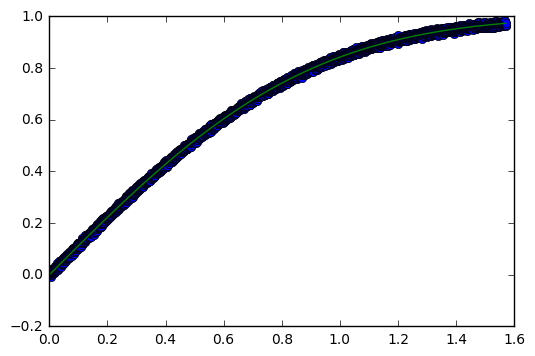

In [103]:
x=num.linspace(0,num.pi/2,10000)
er=0.005*num.random.randn(10000)
y1=sci.erf(x)+er

y=sci.erf(x)
lab.plot(x,y1,'o',x,y,'-')
print(sum(er**2))
def Quad(x,a):
    return(x**a)

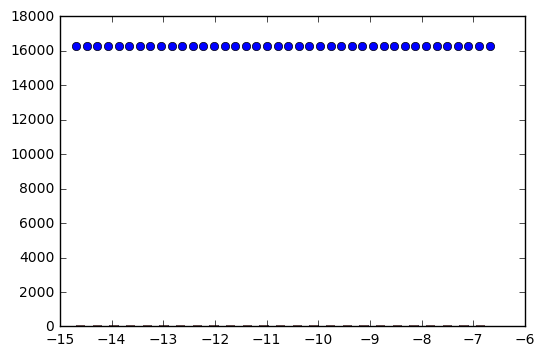

In [104]:
a=[]
error=[]
a0=1
x=df.d
y=df.U
lab.plot(x,y,'o')
for count in range(1,1000):
    
    gamma=0.001
    h=0.001
    
    a.append(a0)
    error.append(Error(x,y,a0,DSF))
    a0=a0-gamma*DerError(x,y,a0,h,DSF,Error)
    
    lab.plot(x,DSF(x,a0),'--')
    lab.show
    

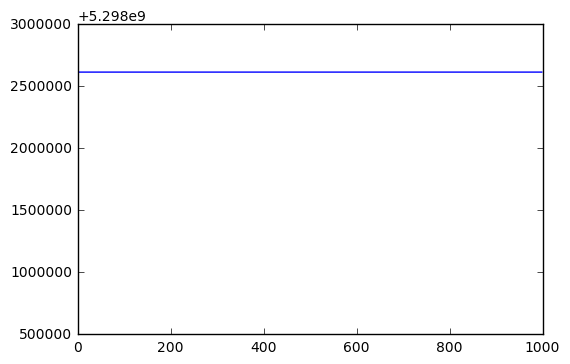

In [105]:
lab.plot(error)

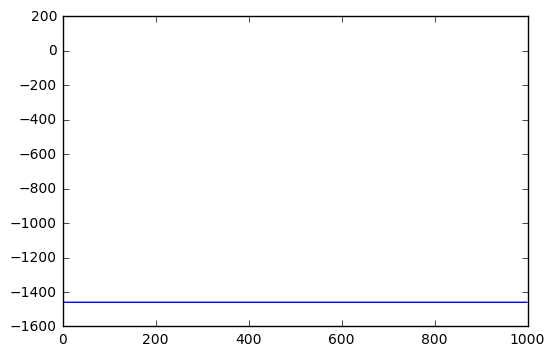

In [106]:
lab.plot(a)

In [26]:
d=pan.read_csv("../PtWaterAdsorption/outGridParam.dat",delimiter="\t",skiprows=1,names=["em","er","sm","sr","error"])
d.sort_values("error",inplace=True)
d.head()

,em,er,sm,sr,error
9591,1.1,1.17,3.3,0.956,49.144630
9494,1.1,1.07,3.3,1.256,49.146655
9398,1.1,0.97,3.3,1.656,49.149334
9493,1.1,1.07,3.3,1.156,49.153150
9397,1.1,0.97,3.3,1.556,49.154305


In [418]:
#na=d.columns
#for var in na:
    #print(var)
 #   lab.plot(d[var])
 #   lab.show()

In [27]:
dRes=pan.read_csv("../PtWaterAdsorption/outGridResult.dat",delimiter="\t",skiprows=1,names=["d","theta","ene","error"])
dRes.sort_values('error',inplace=True)
dRes.head()

,d,theta,ene,error
9591,3.683138,72.919586,-56.04,49.144630
9494,3.690646,72.890694,-56.04,49.146655
9398,3.663149,72.996019,-56.05,49.149334
9493,3.561580,73.408805,-56.08,49.153150
9397,3.566001,73.389062,-56.08,49.154305


In [28]:
d=pan.read_csv("../PtWaterAdsorption/outGDParam.dat",delimiter="\t",skiprows=1,names=["em","er","sm","sr","error"])
d.sort_values("error")
d.head()

,em,er,sm,sr,error
0,0.491493,0.936132,2.735837,1.313862,49.758515
1,0.490705,1.119448,2.919134,1.491763,50.019551
2,0.492571,0.926381,2.726126,1.141940,49.830816
3,0.490857,1.133825,2.933519,1.351714,49.955881
4,0.492554,0.851600,2.651352,1.013680,50.081069


em


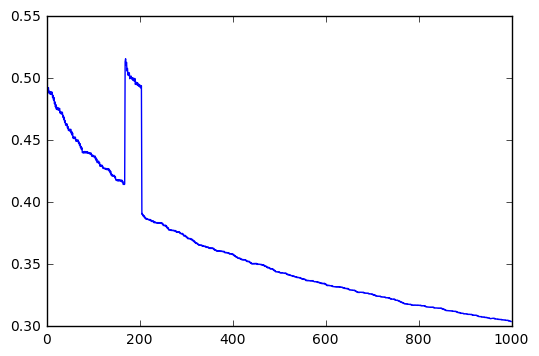

er


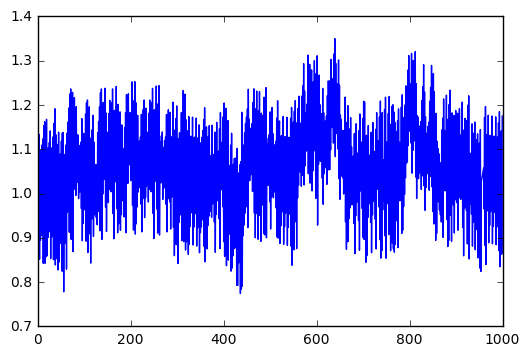

sm


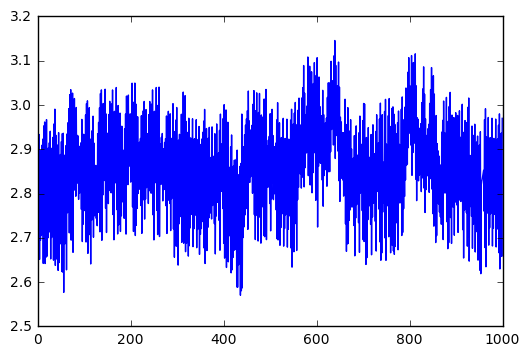

sr


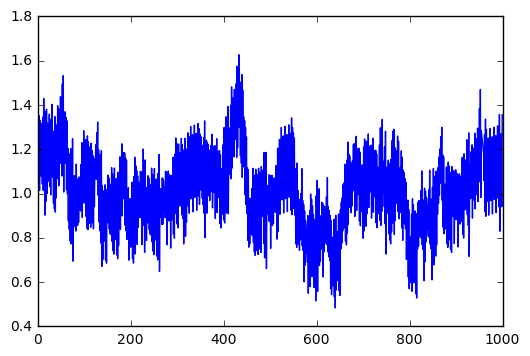

error


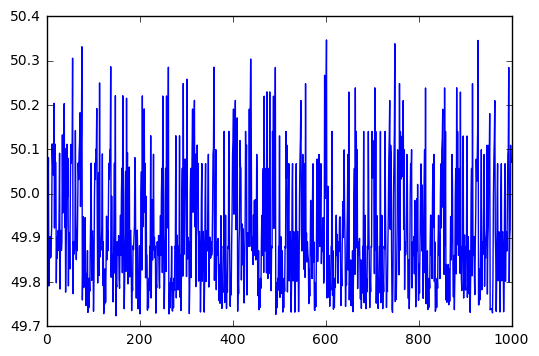

In [30]:
na=d.columns
for var in na:
    print(var)
    lab.plot(d[var])
    lab.show()

In [31]:
dRes=pan.read_csv("../PtWaterAdsorption/outGDResult.dat",delimiter="\t",skiprows=1,names=["d","theta","ene","error"])
dRes.sort_values("error").head()

,d,theta,ene,error
149,4.014554,70.316086,-56.38,49.723922
493,3.989796,70.366615,-56.39,49.727274
263,3.993504,70.358990,-56.39,49.728261
201,4.061719,70.205113,-56.37,49.728414
123,4.030808,70.278719,-56.38,49.728757


d


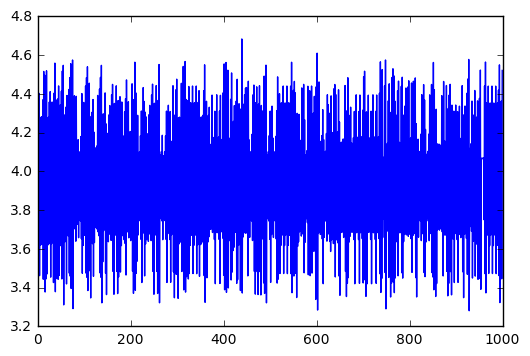

theta


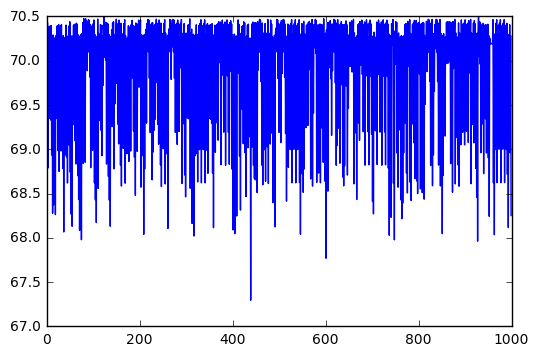

ene


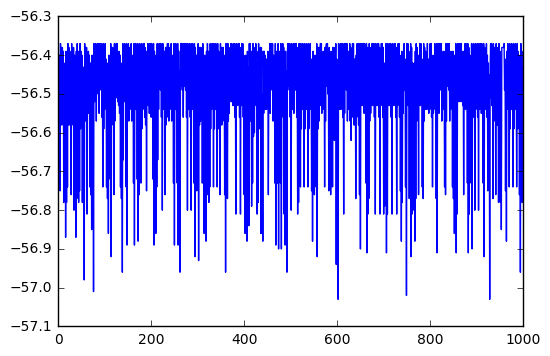

error


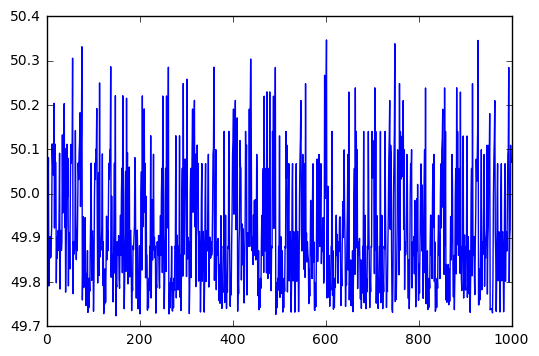

In [33]:
na=dRes.columns
for var in na:
    print(var)
    lab.plot(dRes[var])
    lab.show()

In [546]:
t=0
if t: print("t")